## Лабораторная работа №7 по ПМиАОЗД

### Шаг 1, подключаем библиотеки и смотри данные

In [2]:
# Подключим необходимые библиотеки для проведения анализа
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [3]:
# Читаем файл, 
df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [45]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,7.5,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,7.5,7.5,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,7.5,7.5,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,7.5,7.5,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,7.5,7.5,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,7.5,7.5,NaN,0.01


### Шаг 2. Подготовка данных

- Приведение к нижнему регистру названия столбцов

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

- Преобразование типов данных

In [6]:
# Заменяем тип данных для столбца 'user_score' - также заменяем там значение tbd, перед изменением типа данных
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Заменил значения в 'user_score' и 'critic_score' пустые значения на медианные по столбцу, чтобы не потерять значения.
Для 'genre' на местах пропусков поставил "Не опеределен", чтобы было более понятно, с точки зрения пользователя.

In [8]:
df['genre'] = df['genre'].fillna('undefinded')
median_critic_score = df['critic_score'].median()
median_critic_score = df['user_score'].median()
df['critic_score'] = df['critic_score'].fillna(median_critic_score)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,7.5,7.5,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,7.5,7.5,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,7.5,7.5,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,7.5,7.5,NaN


- Посчитать суммарные продажи во всех регионах

In [9]:
df['sales_total'] = 0
df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,7.5,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,7.5,7.5,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,7.5,7.5,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,7.5,7.5,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,7.5,7.5,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,7.5,7.5,NaN,0.01


## Шаг 3. Исследовательский анализ данных

Составим график сопоставления количества проданных игр по годам.

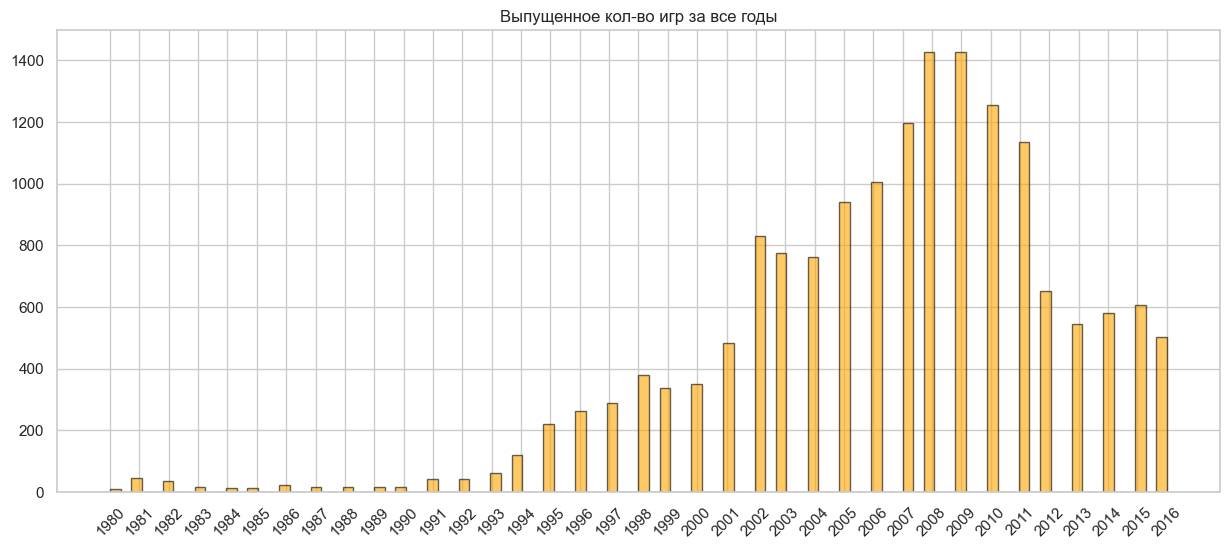

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
plt.hist(df['year_of_release'], bins=100, color='orange', alpha=0.6, align='mid', edgecolor='black', linewidth=1)
plt.title('Выпущенное кол-во игр за все годы')
plt.xticks(df['year_of_release'][pd.notna(df['year_of_release'])].unique(), rotation=45)
plt.show()

Построение графика продаж по системе распространения игр, консоли, пк, прочие.

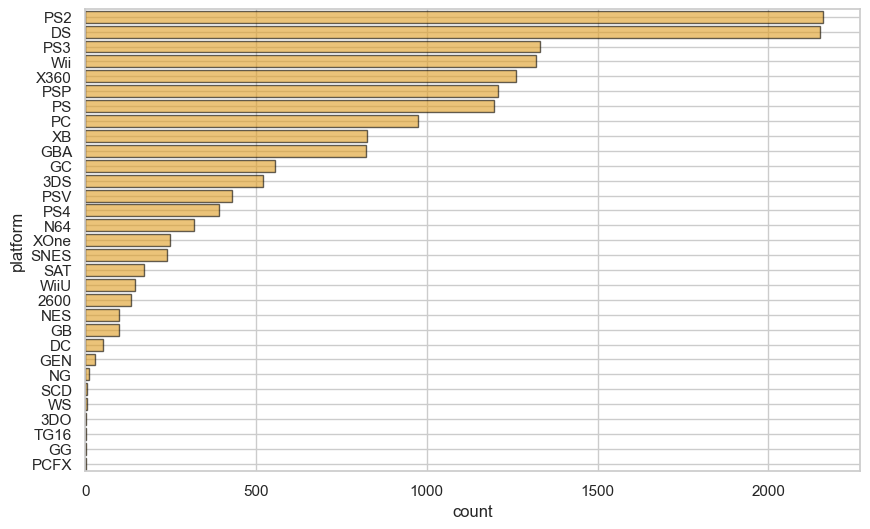

In [47]:
sorted_df = df['platform'].value_counts().reset_index()
sorted_df.columns = ['platform', 'count']
sorted_df = sorted_df.sort_values(by='count', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='platform', data=sorted_df, color='orange', alpha=0.6, edgecolor='black', linewidth=1)
plt.grid ( True )
plt.show()

    Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS.

- График «ящик с усами» динамики продаж консолей в виде 

In [25]:
platform_sales = df.pivot_table(index=['platform'], values='sales_total', aggfunc='sum').sort_values('sales_total', ascending=False)
platform_sales = platform_sales.reset_index()
box_total = np.zeros((2, len(platform_sales)))
for i in range(len(platform_sales)):
    box_total[0][i] = i
    box_total[1][i] = platform_sales['sales_total'].loc[i]
box_total

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 4.00000e+00,
        5.00000e+00, 6.00000e+00, 7.00000e+00, 8.00000e+00, 9.00000e+00,
        1.00000e+01, 1.10000e+01, 1.20000e+01, 1.30000e+01, 1.40000e+01,
        1.50000e+01, 1.60000e+01, 1.70000e+01, 1.80000e+01, 1.90000e+01,
        2.00000e+01, 2.10000e+01, 2.20000e+01, 2.30000e+01, 2.40000e+01,
        2.50000e+01, 2.60000e+01, 2.70000e+01, 2.80000e+01, 2.90000e+01,
        3.00000e+01],
       [1.25577e+03, 9.71420e+02, 9.39650e+02, 9.07510e+02, 8.06120e+02,
        7.30860e+02, 3.17850e+02, 3.14140e+02, 2.94050e+02, 2.59520e+02,
        2.59000e+02, 2.57740e+02, 2.55460e+02, 2.51050e+02, 2.18680e+02,
        2.00040e+02, 1.98930e+02, 1.59320e+02, 9.69800e+01, 8.21900e+01,
        5.40700e+01, 3.35900e+01, 3.07700e+01, 1.59500e+01, 1.86000e+00,
        1.44000e+00, 1.42000e+00, 1.60000e-01, 1.00000e-01, 4.00000e-02,
        3.00000e-02]])

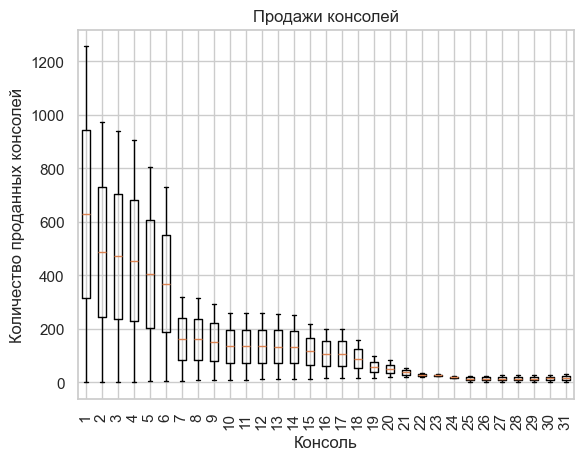

In [38]:
plt.grid()
plt.boxplot(box_total)
plt.xticks(rotation=90)
plt.title('Продажи консолей')
plt.xlabel('Консоль')
plt.ylabel('Количество проданных консолей')
plt.grid ( True )
plt.show()

- Продажи топ-10 консолей

In [30]:
df.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Из анализа данных понятно, что самая популяная платформа консолей - это Play Station, а самая популярная модель - это PS2. Вторая Консоль, которая занимает второе место - это XBox с моделью X360.

- Самые прибыльные жанры

In [29]:
df.groupby('genre')['sales_total'].sum().to_frame().sort_values(by='sales_total', ascending=False)

,sales_total
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


- График количества игр по жанрам

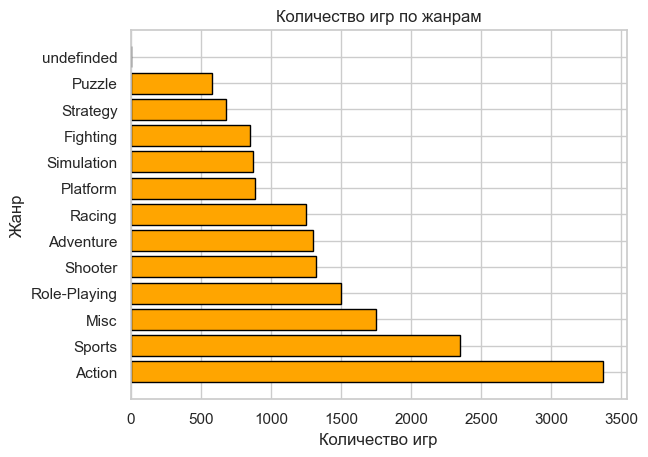

In [37]:
game_genre = df.pivot_table(index=['genre'], values='name', aggfunc='count').sort_values('name', ascending=False)
game_genre = game_genre.reset_index()
plt.grid()
plt.barh(game_genre['genre'], game_genre['name'], color ='orange', alpha=1, edgecolor='black', linewidth=1)
plt.title('Количество игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.grid ( True )
plt.show()

Исходя из графика, можно сделать вывод, что самый популярные жанры это Экшен, Спорт, Музыка, Ролеплей,Шутер.
Скорее всего, в ближайшее время эта тенденция продолжиться. Следовательно, можно увеличить количество игр, этих жанров, так как они популярны у игроков и пользователей компьютеров.

## Шаг 4. Построение профиля пользователей по регионам.

In [44]:
# сортируем игровые платформы по регионам Северная Америка, Европа, Япония
top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# сортируем игровые жанры по регионам Северная Америка, Европа, Япония
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# сортируем продажи по регионам Северная Америка, Европа, Япония
sales_by_rating_na = df.groupby('rating')['na_sales'].sum()
sales_by_rating_eu = df.groupby('rating')['eu_sales'].sum()
sales_by_rating_jp = df.groupby('rating')['jp_sales'].sum()

# составление профиля пользователя, исходя из полученных выше данных
average_user = {
    'Среднестистический пользователь в Северной Америке': {
        'Самые популярные платформы': top_platforms_na.index.tolist(),
        'Самые популярные жанры': top_genres_na.index.tolist(),
    },
    'Среднестистический пользователь в Европе': {
        'Самые популярные платформы': top_platforms_eu.index.tolist(),
        'Самые популярные жанры': top_genres_eu.index.tolist(),
    },
    'Среднестистический пользователь в Японии': {
        'Самые популярные платформы': top_platforms_jp.index.tolist(),
        'Самые популярные жанры': top_genres_jp.index.tolist(),
    }
}
# формирования датасета-таблицы
df_average = pd.DataFrame(average_user)

df_average

,Среднестистический пользователь в Северной Америке,Среднестистический пользователь в Европе,Среднестистический пользователь в Японии
Самые популярные платформы,"[X360, PS2, Wii, PS3, DS]","[PS2, PS3, X360, Wii, PS]","[DS, PS, PS2, SNES, 3DS]"
Самые популярные жанры,"[Action, Sports, Shooter, Platform, Misc]","[Action, Sports, Shooter, Racing, Misc]","[Role-Playing, Action, Sports, Platform, Misc]"


## Шаг 5. Вывод

Рынок десктопных игр уступает место технологическим новинкам, вызывая рост бюджетов. Большие компании гонятся за графикой, в то время как меньшие сталкиваются с трудностями. Изменение ценностей приводит к снижению интереса к глубоким играм, что влияет на общий спад рынка.